## Import Linbraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import optimize as op
from scipy.optimize import curve_fit
import math
import torch
import os

maxfev: This specifies the maximum number of function evaluations allowed during the optimization process.

p0: This is an optional argument that specifies the initial guess for the parameters of the model function.

bounds: This is an optional argument that specifies the lower and upper bounds on the parameters.

In [31]:
len(plt.cm.tab20.colors)

20

: 

: 

In [32]:
def fit_curve_act(data, function, maxfev, p0, bounds, name, columns, folder):
    
    # fault free parameters of tanh
    fault_free_etas = (0.0568, -0.9188,  0.2366, -9.2469)
    
    data_size = data.shape[0]
    data_stats = data.shape[1]

    x = np.linspace(-2, 2, data_size)
    result = []
    
    save_folder = f'{folder}/{name}'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    df = pd.DataFrame(columns=columns)
    df[columns[0]] = x
    
    # Generate colors from a colormap
    colors = plt.cm.tab20.colors
    plt.figure()
    plt.plot(x, function(x, *fault_free_etas), color=colors[0], label='fault free')
    
    for k, column in enumerate(columns[1:-1]):
        y = data[:, k]
        popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)
        df[column] = function(x, *popt)
        
        # eta_1, eta_2, eta_3, eta_4 = popt
        result.append(list(popt))
        
        print('size of x, y:', x.shape, y.shape)

        # plt.figure()
        # plt.plot(x, y, color='green', label='SPICE')
        # plt.plot(x, function(x, *popt), '--', color=colors[k+1], label='Fitting')
        plt.plot(x, function(x, *popt), '--', color=colors[k+1], label='fault {}'.format(k+1))
        
        plt.xlim(-2, 2)
        plt.legend()
        # plt.savefig(f'./{save_folder}/{name}{k}.pdf', format='pdf', bbox_inches='tight')
        # plt.close()
    plt.savefig(f'./{save_folder}/{name}_all.jpg', format='jpg', bbox_inches='tight')
    plt.close()
        
    # Save the dataframe to a CSV file
    df.to_csv(f'./{save_folder}/{name}_predicted.csv', index=False)
        
        
    return result

: 

: 

## pTanh

In [33]:
def ptanh(x, eta1,eta2,eta3,eta4):
    return eta1 + eta2 * np.tanh((x - eta3) * eta4)

### Faulty

In [34]:
ptanh_data = torch.load('./v3_SimulationDataset/single_fault/faulty/ptanh_fault.data').numpy()
ptanh_data.shape

(4001, 12)

In [35]:
columns = ['X', 'M1_G-D_short', 'M1_G-S_short', 'M2_G-D_short', 'M2_G-S_short',
       'R1_open', 'R1_short', 'R2_short', 'M1_open', 'M2_open', 'M1_D-S_short',
       'M2_D-S_short', 'R2_open']
len(columns)

13

In [36]:
maxfev=1000000
p0=[0., -1., 0., 0.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
ptanh_result = fit_curve_act(ptanh_data, ptanh, name='ptanh', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/faulty/figures', columns=columns)

size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)


/scratch/ipykernel_313935/2782915607.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)


In [37]:
ptanh_a = torch.tensor(ptanh_result)
ptanh_a.shape

torch.Size([11, 4])

In [38]:
ptanh_a

tensor([[ 4.6647e-02, -9.5249e-01, -6.7710e-01,  1.2716e+01],
        [-9.0895e-01, -1.0020e+00, -1.1339e-02,  1.3834e-03],
        [-6.2602e-01, -2.0920e-02,  6.0946e-01,  1.5644e+00],
        [ 9.9985e-01, -1.0000e+00,  0.0000e+00,  2.4316e-17],
        [ 9.9985e-01, -1.0000e+00,  0.0000e+00,  2.4316e-17],
        [-9.1036e-01, -1.0000e+00,  0.0000e+00, -4.0192e-17],
        [ 1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4982e-16],
        [-9.1036e-01, -1.0000e+00,  0.0000e+00, -4.0192e-17],
        [ 1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4982e-16],
        [ 9.9985e-01, -1.0000e+00,  0.0000e+00,  2.4316e-17],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16]],
       dtype=torch.float64)

### Non Faulty

In [39]:
nptanh_data = torch.load('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/nptanh_fault.data').numpy()
nptanh_data.shape

(4001, 1)

In [40]:
columns = ['X', 'Y']
len(columns)

2

In [41]:
maxfev=1000000
p0=[0., -1., 0., 0.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
nptanh_result = fit_curve_act(nptanh_data, ptanh, name='ptanh', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/figures', columns=columns)

In [42]:
nptanh_a = torch.tensor(nptanh_result)
nptanh_a.shape

torch.Size([0])

In [43]:
nptanh_a


tensor([])

## Sigmoid

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def modified_sigmoid(x, eta1,eta2,eta3,eta4):
    return eta1 + eta2 * sigmoid((x - eta3) * eta4)

### Faulty Circuit

In [45]:
fsigm_data = torch.load('./v3_SimulationDataset/single_fault/faulty/With header/p-sigm_fault.data').numpy()
fsigm_data.shape

(2458, 14)

In [46]:
columns = ['X', 'R1_short', 'M1_G-D', 'M1_G-S', 'R2_open', 'R1_open', 'M1_D-S',
       'M2_open', 'M1_open', 'R3_short', 'R3_open', 'R2_short', 'M2_G-S',
       'M2_G-D', 'M2_D-S']
len(columns)

15

size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)
size of x, y: (2458,) (2458,)


/scratch/ipykernel_313935/2782915607.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)


KeyboardInterrupt: 

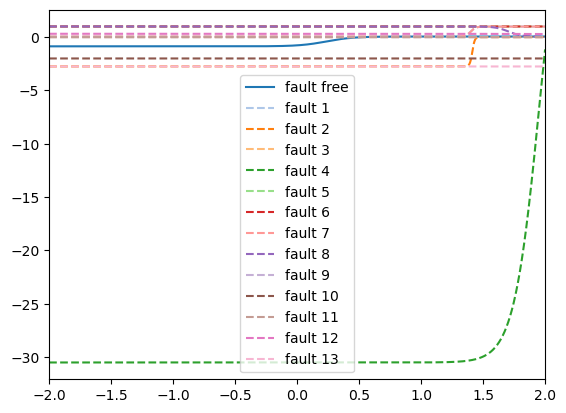

In [47]:
maxfev=1000000000
p0=[0., 0, 1., 50]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
fsigm_result = fit_curve_act(fsigm_data, modified_sigmoid, name='sigm', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/faulty/figures', columns=columns)

In [19]:
fsigm_a = torch.tensor(fsigm_result)
fsigm_a.shape

torch.Size([13, 4])

In [20]:
fsigm_a

tensor([[ 5.5417e-02,  9.3647e-01,  1.4002e+00,  4.9676e+01],
        [-2.7483e+00,  2.7530e+00,  1.4129e+00,  1.0269e+02],
        [ 5.3625e-03, -8.6046e-18,  1.0000e+00,  5.0000e+01],
        [-3.0510e+01,  4.7455e+01,  1.9509e+00,  9.8507e+00],
        [ 1.0000e+00,  1.1965e-16,  1.0000e+00,  5.0000e+01],
        [ 9.9985e-01,  1.0039e-09,  1.2932e+00,  5.6366e+01],
        [ 5.5417e-02,  9.3647e-01,  1.4002e+00,  4.9676e+01],
        [ 9.9996e-01, -9.5299e-01,  1.7045e+00,  1.9546e+01],
        [ 2.2500e-04,  3.4604e-19,  1.0000e+00,  5.0000e+01],
        [-2.0000e+00, -2.3930e-16,  1.0000e+00,  5.0000e+01],
        [ 2.5361e-03,  2.0784e-04,  1.2791e+00,  1.0141e+01],
        [ 3.1594e-01, -2.5009e-02,  1.5581e+00,  5.9755e+00],
        [-2.7500e+00, -1.5708e-15,  1.0000e+00,  5.0000e+01]],
       dtype=torch.float64)

### Non Faulty

In [ ]:
npsigm_data = torch.load('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/npsigm_fault.data').numpy()
npsigm_data.shape

(4001, 1)

In [22]:
columns = ['X', 'Y']
len(columns)

2

In [ ]:
maxfev=1000000
p0=[0., -1., 0., 0.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
npsigm_result = fit_curve_act(npsigm_data, modified_sigmoid, name='sigmoid', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/figures', columns=columns)

In [24]:
npsigm_a = torch.tensor(npsigm_result)
npsigm_a.shape

torch.Size([0])

In [ ]:
npsigm_a

tensor([])

## ReLU

### Faulty

In [26]:
def softplus(x, beta):
    """Softplus function with sharpness parameter."""
    return (1.0 / beta) * np.log(1 + np.exp(beta * x))

def combined_function(x, alpha, beta, gamma, phi, sharpness):
    """Modified function combining linear and softplus terms."""
    return alpha * (x - gamma) + beta * softplus(x - gamma, sharpness) + phi


In [ ]:
relu_data = torch.load('./v3_SimulationDataset/single_fault/faulty/p-ReLU_fault.data').numpy()
relu_data.shape

(4002, 12)

In [28]:
columns = ['X', 'R1_short', 'R1_open', 'R3_short', 'R2_open', 'R3_open', 'R4_open',
       'R2_short', 'G-D short(output_correct)', 'G-S short', 'D-S short',
       'Transistor-open', 'R4_short']
len(columns)

13

In [ ]:
maxfev=1000000
p0=[0.2, 1., 0., 0., 10.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])
relu_result = fit_curve_act(relu_data, combined_function, name='ReLU', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/faulty/figures', columns=columns)

TypeError: combined_function() missing 1 required positional argument: 'sharpness'

<Figure size 640x480 with 0 Axes>

In [50]:
relu_a = torch.tensor(relu_result)
relu_a.shape

torch.Size([12, 5])

In [51]:
relu_a

tensor([[ 7.6165e-03,  6.8885e-01,  1.8915e-01, -9.0097e-03,  7.6195e+00],
        [ 6.9539e-01, -6.9520e-01, -1.8925e-01,  1.0383e-02,  7.6570e+00],
        [ 7.1250e-01, -5.3098e-01, -2.2832e-01, -3.2300e-02,  6.7483e+00],
        [-2.1845e-04,  6.9607e-01,  1.8774e-01, -1.0552e-02,  7.6569e+00],
        [-2.1845e-04,  6.9607e-01,  1.8774e-01, -1.0552e-02,  7.6569e+00],
        [-2.1845e-04,  6.9607e-01,  1.8774e-01, -1.0552e-02,  7.6569e+00],
        [-2.1845e-04,  6.9607e-01,  1.8774e-01, -1.0552e-02,  7.6569e+00],
        [ 7.6164e-03,  6.8885e-01,  1.8915e-01, -9.0097e-03,  7.6195e+00],
        [ 7.1242e-01, -5.3090e-01, -2.2821e-01, -3.2292e-02,  6.7537e+00],
        [ 1.0003e+00, -1.5525e-06, -2.9949e-04,  2.0097e-04,  9.9770e+00],
        [ 1.0003e+00, -1.5525e-06, -2.9949e-04,  2.0097e-04,  9.9770e+00],
        [ 1.0003e+00, -1.5525e-06, -2.9949e-04,  2.0097e-04,  9.9770e+00]],
       dtype=torch.float64)

### Non Faulty

In [52]:
nrelu_data = torch.load('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/nprelu_fault.data').numpy()
nrelu_data.shape

(4001, 1)

In [53]:
columns = ['X', 'Y']
len(columns)

2

In [54]:
maxfev=1000000
p0=[0.2, 1., 0., 0., 10.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])
nrelu_result = fit_curve_act(nrelu_data, combined_function, name='ReLU', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/figures', columns=columns)

size of x, y: (4001,) (4001,)


In [55]:
nrelu_a = torch.tensor(nrelu_result)
nrelu_a.shape

torch.Size([1, 5])

In [56]:
nrelu_a

tensor([[ 1.8413e-02,  6.6951e-01,  2.0333e-01, -3.3020e-03,  7.7442e+00]],
       dtype=torch.float64)

## Clip ReLU

In [57]:
import numpy as np

def clipped_relu(Vz, eta_CR_1, eta_CR_2, eta_CR_3, eta_CR_4):
    """
    Calculate the clipped ReLU activation based on provided thresholds.
    
    Parameters:
        Vz (float or np.array): Input values
        eta_CR_1, eta_CR_2, eta_CR_3, eta_CR_4 (float): Predefined constants for the activation function
        
    Returns:
        Va (float or np.array): Activated values after applying clipped ReLU
    """
    linear_segment = eta_CR_1 + (eta_CR_2 - eta_CR_1) / (eta_CR_4 - eta_CR_3) * (Vz - eta_CR_3)
    Va = np.where(Vz < eta_CR_3, eta_CR_1, np.where(Vz <= eta_CR_4, linear_segment, eta_CR_2))

    return Va

### Faulty Circuit

In [58]:
fcp_data = torch.load('./v3_SimulationDataset/single_fault/faulty/p-CP_fault.data').numpy()
fcp_data.shape

(4001, 5)

In [59]:
columns = ['X', 'R-open_(Vt shift)', 'R_Short', 'G-D short', 'G-S short',
       'D-S short']
len(columns)

6

In [60]:
maxfev=1000000
p0=[-0.6, 0.6, 0.2, 0.4]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
fcp_result = fit_curve_act(fcp_data, clipped_relu, name='Clip ReLU', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/faulty/figures', columns=columns)

size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)


/scratch/ipykernel_161421/3705035670.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)


In [61]:
fcp_a = torch.tensor(fcp_result)
fcp_a.shape

torch.Size([5, 4])

In [62]:
fcp_a

tensor([[ 2.2930e-03,  9.9901e-01, -4.6596e-01,  7.0913e-01],
        [ 6.0268e-07,  3.1167e-04,  2.5654e-01,  1.7848e+00],
        [ 1.7028e-03,  9.7721e-01, -9.2145e-03,  1.1823e+00],
        [-2.0000e+00,  2.0003e+00, -2.0000e+00,  2.0003e+00],
        [ 1.0000e+00,  1.0000e+00,  2.0000e-01,  4.0000e-01]],
       dtype=torch.float64)

### Non Faulty

In [63]:
ncr_data = torch.load('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/npcr_fault.data').numpy()
ncr_data.shape

(4001, 1)

In [65]:
columns = ['X', 'Y']
len(columns)

2

In [66]:
maxfev=1000000
p0=[-0.6, 0.6, 0.2, 0.4]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
ncp_result = fit_curve_act(ncr_data, clipped_relu, name='Clip ReLU', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/figures', columns=columns)

size of x, y: (4001,) (4001,)


In [67]:
ncp_a = torch.tensor(ncp_result)
ncp_a.shape

torch.Size([1, 4])

In [68]:
ncp_a

tensor([[ 0.0015,  0.9613, -0.0266,  1.1767]], dtype=torch.float64)

## Fault modeling

In [16]:
def fit_curve_act(data, function, maxfev, p0, bounds, name, columns, folder):
    
    fault_free_etas = (0.0568, -0.9188,  0.2366, -9.2469)
    
    data_size = data.shape[0]
    data_stats = data.shape[1]

    x = np.linspace(-2, 2, data_size)
    result = []
    
    save_folder = f'{folder}/{name}'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    df = pd.DataFrame(columns=columns)
    df[columns[0]] = x
    
    
    # Generate colors from a colormap
    colors = plt.cm.tab20.colors
    plt.figure()
    plt.plot(x, function(x, *fault_free_etas), color='green', label='fault free')
    # result.append(fault_free_etas)
    
    for k, column in enumerate(columns[1:]):
        # if k==11:
        #     continue
        y = data[:, k]
        popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)
        df[column] = function(x, *popt)
        
        # eta_1, eta_2, eta_3, eta_4 = popt
        result.append(popt)
        
        print('size of x, y:', x.shape, y.shape)

        # plt.figure()
        # plt.plot(x, y, color='green', label='SPICE')
        # plt.plot(x, function(x, *popt), '--', color=colors[k+1], label='Fitting')
        # if k+1 == 8 or k+1 == 6 or k+1 == 7 or k+1 == 2:
        #     continue
        plt.plot(x, function(x, *popt), '--', color=colors[k+1], label='fault {}'.format(k+1))
        
        plt.xlim(-2, 2)
        plt.legend()
        # plt.savefig(f'./{save_folder}/{name}{k}.pdf', format='pdf', bbox_inches='tight')
        # plt.close()
    plt.show()
    # plt.close()
        
    # Save the dataframe to a CSV file
    # df.to_csv(f'./{save_folder}/{name}_predicted.csv', index=False)
        
        
    return x, result

In [17]:
def fit_curve_act2(data, function, maxfev, p0, bounds, name, columns, folder):
    
    fault_free_etas = (0.0568, -0.9188,  0.2366, -9.2469)
    
    data_size = data.shape[0]
    data_stats = data.shape[1]

    x = np.linspace(-2, 2, data_size)
    result = []
    
    save_folder = f'{folder}/{name}'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    df = pd.DataFrame(columns=columns)
    df[columns[0]] = x
    
    # Plot all curves
    plt.figure(figsize=(4, 3))
    colors = plt.cm.tab20.colors
    plt.plot(x, function(x, *fault_free_etas), color='green', label='Fault-Free', linewidth=3)

    offset = 0.04  # Offset to separate overlapping curves visually
    alpha = 0.8   # Transparency for overlapping curves
    markers = ['o', 's', 'd', '^', 'v']  # Add markers for distinguishability
    
    for k, column in enumerate(columns[1:]):
        y = data[:, k]
        popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)
        df[column] = function(x, *popt)
        result.append(popt)
        adjusted_y = function(x, *popt) + (k % 5) * offset  # Add slight vertical offset to avoid overlap
        if k==11:
            continue
        plt.plot(x, adjusted_y, '--', alpha=alpha, color=colors[(k + 1) % len(colors)], 
             marker=markers[k % len(markers)], markevery=500, markersize=1, linewidth=2)

    # Add a single legend entry for "Faulty" (dummy line for legend)
    plt.plot([], [], linestyle='--', color='gray', linewidth=2, label='Faulty')

    plt.legend(loc='center left', fontsize=12, ncol=1)
    plt.xlabel("V$_{in}$(v)", fontsize=18, )
    plt.ylabel("V$_{out}$(v)", fontsize=18, )
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    # plt.title("Curve Fitting with Fault Data (Adjusted for Overlaps)")
    # plt.tight_layout()
    plt.show()

    return x

In [18]:
def ptanh(x, eta1,eta2,eta3,eta4):
    return eta1 + eta2 * np.tanh((x - eta3) * eta4)

In [19]:
ptanh_data = torch.load('./v3_SimulationDataset/single_fault/faulty/ptanh_fault.data').numpy()
ptanh_data.shape

(4001, 12)

In [20]:
columns = ['X', 'M1_G-D_short', 'M1_G-S_short', 'M2_G-D_short', 'M2_G-S_short',
       'R1_open', 'R1_short', 'R2_short', 'M1_open', 'M2_open', 'M1_D-S_short',
       'M2_D-S_short', 'R2_open']
len(columns)

13

/scratch/ipykernel_631336/972412485.py:29: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)


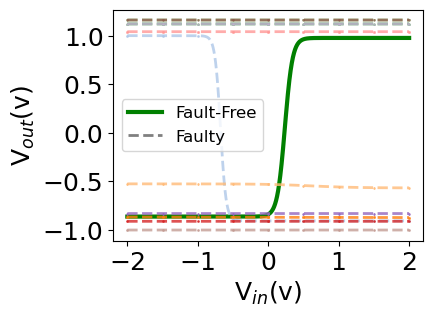

array([-2.   , -1.999, -1.998, ...,  1.998,  1.999,  2.   ])

In [21]:

maxfev=1000000
p0=[0., -1., 0., 0.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
fit_curve_act2(ptanh_data, ptanh, name='ptanh', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/faulty/figures', columns=columns)


size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)
size of x, y: (4001,) (4001,)


/scratch/ipykernel_631336/2141275249.py:29: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)


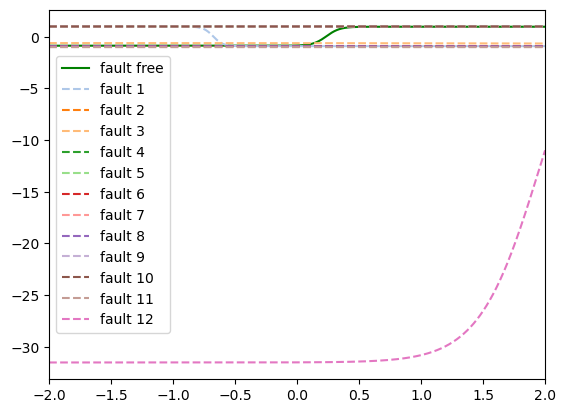

In [22]:
maxfev=1000000
p0=[0., -1., 0., 0.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
x, ptanh_result = fit_curve_act(ptanh_data, ptanh, name='ptanh', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/faulty/figures', columns=columns)

In [23]:
y = [ptanh(x, *ptanh_result[i]) for i in range(len(ptanh_result))]
y = np.array(y)
label = np.array(range(len(y)))
np.expand_dims(y, axis=2).shape, np.expand_dims(label, axis=1).shape

((12, 4001, 1), (12, 1))

Testing 4 clusters...
Testing 5 clusters...
Testing 6 clusters...
Testing 7 clusters...
Testing 8 clusters...
Testing 9 clusters...
Testing 10 clusters...
Testing 11 clusters...
Processed clusters: 8


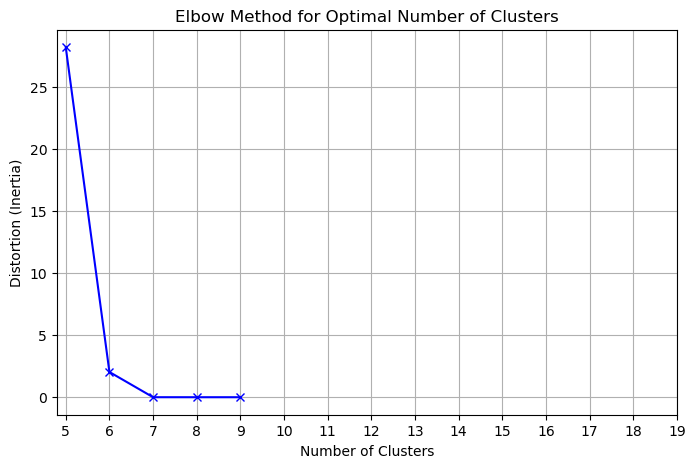

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

# Assuming ptanh and ptanh_result are defined elsewhere
# Prepare data
y = [ptanh(x, *ptanh_result[i]) for i in range(len(ptanh_result))]
y = np.array(y)
label = np.array(range(len(y)))
y = np.expand_dims(y, axis=2)
label = np.expand_dims(label, axis=1)

# Preprocessing
# X_train = TimeSeriesScalerMeanVariance().fit_transform(y[:19])
X_train = y[:12]
X_train = TimeSeriesResampler(sz=4001).fit_transform(X_train)

# Elbow method
distortions = []
K_range = range(4, 12)  # Test 5 to 19 clusters

for k in K_range:
    try:
        print(f"Testing {k} clusters...")  # Debugging: Log each cluster test
        km = TimeSeriesKMeans(n_clusters=k, verbose=False, random_state=0)
        km.fit(X_train)
        distortions.append(km.inertia_)  # Sum of squared distances to the closest centroid
    except Exception as e:
        print(f"Error for {k} clusters: {e}")
        break  # Exit the loop if an error occurs

# Check if the entire range was processed
print(f"Processed clusters: {len(distortions)}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(5, 5 + len(distortions)), distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(5, 20))  # Ensure all tested clusters are shown
plt.grid()
plt.show()


In [25]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
    
y = [ptanh(x, *ptanh_result[i]) for i in range(len(ptanh_result))]
y = np.array(y)
label = np.array(range(len(y)))
np.expand_dims(y, axis=2).shape, np.expand_dims(label, axis=1).shape

seed = 0
numpy.random.seed(seed)
# X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# X_train = X_train[y_train < 4]  # Keep first 3 classes
# numpy.random.shuffle(X_train)
# Keep only 50 time series
y = np.expand_dims(y, axis=2)
label = np.expand_dims(label, axis=1)

# X_train = TimeSeriesScalerMeanVariance().fit_transform(y[:13])
# Make time series shorter
X_train = TimeSeriesResampler(sz=4001).fit_transform(y[:12])
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
n_clusters=7
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=seed)
y_pred_euc = km.fit_predict(X_train)



Euclidean k-means
0.000 --> 0.000 --> 0.000 --> 


In [12]:
# DBA-k-means
print("DBA k-means")
n_clusters=7
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred_dba = dba_km.fit_predict(X_train)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   11.8s finished


0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   11.0s finished


0.000 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    9.2s finished


0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    9.5s finished


0.000 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    9.3s finished


: 

: 

: 

In [26]:
import numpy as np
from tslearn.metrics import cdist_dtw  # Use DTW if necessary, or stick to Euclidean

# Calculate centroids
centroids = km.cluster_centers_

# Find the closest transfer function to each centroid
closest_indices = []
for cluster_id in range(n_clusters):
    # Get the indices of time series in the current cluster
    cluster_indices = np.where(y_pred_euc == cluster_id)[0]
    cluster_transfers = X_train[cluster_indices]
    
    # Compute distances to the centroid
    distances = np.linalg.norm(cluster_transfers - centroids[cluster_id], axis=(1, 2))
    
    # Find the index of the closest transfer function
    closest_index_within_cluster = np.argmin(distances)
    closest_global_index = cluster_indices[closest_index_within_cluster]
    
    # Store the global index of the closest transfer function
    closest_indices.append(closest_global_index)

print("Closest transfer function indices for each cluster:", closest_indices)


Closest transfer function indices for each cluster: [3, 11, 5, 0, 2, 10, 1]


In [27]:
y_pred_euc

array([3, 6, 4, 0, 0, 2, 0, 2, 0, 0, 5, 1])

In [28]:
ptanh_result

[array([ 0.04664735, -0.9524904 , -0.67709848, 12.71609652]),
 array([-0.90895256, -1.0020349 , -0.01133903,  0.00138339]),
 array([-0.6260197 , -0.02092049,  0.60945732,  1.56440904]),
 array([ 9.99850000e-01, -1.00000000e+00,  0.00000000e+00,  2.43157897e-17]),
 array([ 9.99850000e-01, -1.00000000e+00,  0.00000000e+00,  2.43157897e-17]),
 array([-9.10357000e-01, -1.00000000e+00,  0.00000000e+00, -4.01924431e-17]),
 array([ 1.00000000e+00, -1.00000000e+00,  0.00000000e+00,  4.49821025e-16]),
 array([-9.10357000e-01, -1.00000000e+00,  0.00000000e+00, -4.01924431e-17]),
 array([ 1.00000000e+00, -1.00000000e+00,  0.00000000e+00,  4.49821025e-16]),
 array([ 9.99850000e-01, -1.00000000e+00,  0.00000000e+00,  2.43157897e-17]),
 array([-1.00000000e+00, -1.00000000e+00,  0.00000000e+00,  4.40703031e-16]),
 array([-12.90447975, -18.61920747,   1.95014008,  -2.07364395])]

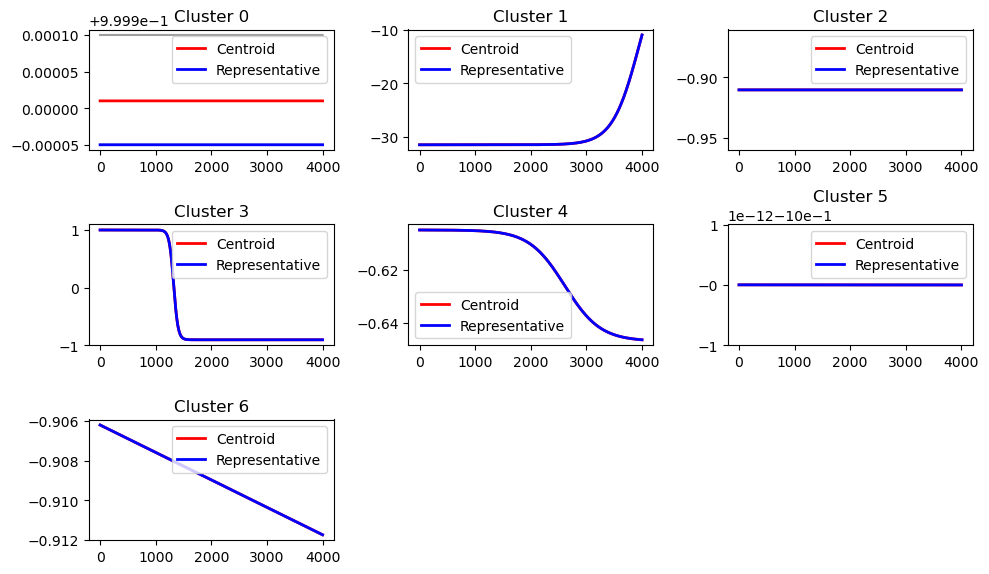

: 

: 

: 

In [15]:
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    plt.subplot(3, 3, cluster_id + 1)
    for idx in np.where(y_pred_euc == cluster_id)[0]:
        plt.plot(X_train[idx].ravel(), "gray", alpha=0.5)
    plt.plot(centroids[cluster_id].ravel(), "red", label="Centroid", linewidth=2)
    plt.plot(X_train[closest_indices[cluster_id]].ravel(), "blue", label="Representative", linewidth=2)
    plt.title(f"Cluster {cluster_id}")
    plt.legend()
plt.tight_layout()
plt.show()


Euclidean k-means


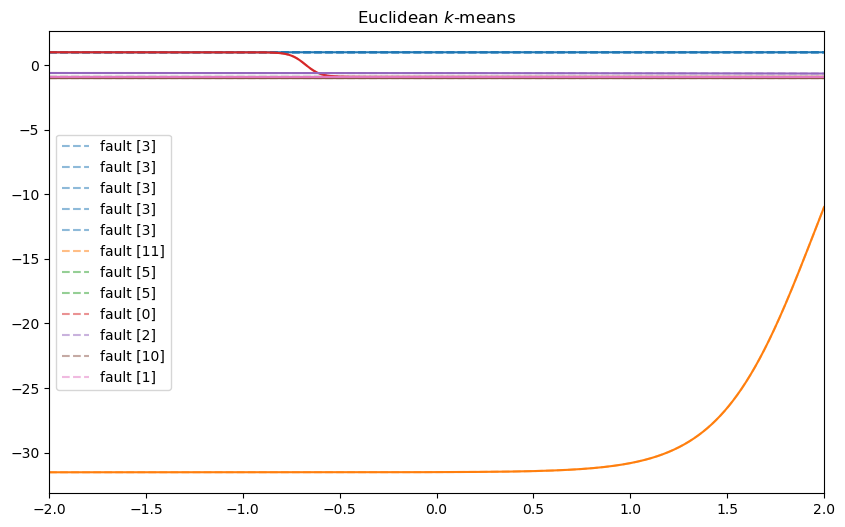

: 

: 

: 

In [16]:
colors = plt.cm.tab10.colors

plt.figure(figsize=(10, 6))

# Euclidean k-means
print("Euclidean k-means")
plt.subplot(1, 1, 1)
for yi in range(n_clusters):
    # if yi == 1:
    #     continue
    for j, xx in enumerate(X_train[y_pred_euc == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_euc == yi][0]), alpha=0.5)
    plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi])
    
    plt.xlim(-2, 2)
    plt.legend()
    
    if yi == 1:
        plt.title("Euclidean $k$-means")

Euclidean k-means


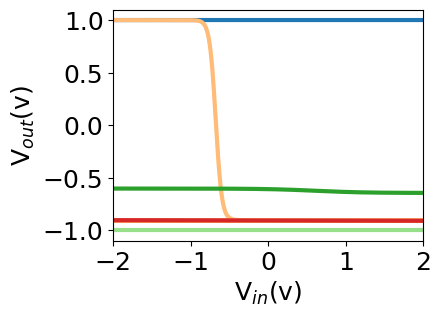

In [29]:
colors = plt.cm.tab20.colors

plt.figure(figsize=(4, 3))

# Euclidean k-means
print("Euclidean k-means")
plt.subplot(1, 1, 1)
for yi in range(n_clusters):
    if yi == 1:
        continue
    for j, xx in enumerate(X_train[y_pred_euc == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_euc == yi][0][0]), alpha=0.1)
    plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi], linewidth=3)
    
    plt.xlim(-2, 2)
    # plt.legend()
    plt.xlabel("V$_{in}$(v)", fontsize=18, )
    plt.ylabel("V$_{out}$(v)", fontsize=18, )
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [18]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
n_clusters=7
sdtw_km = TimeSeriesKMeans(n_clusters=n_clusters,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred_sdtw = sdtw_km.fit_predict(X_train)

Soft-DTW k-means


4549.427 --> 4698.498 --> 

KeyboardInterrupt: 

: 

: 

: 

Euclidean k-means
DBA k-means
Soft-DTW k-means


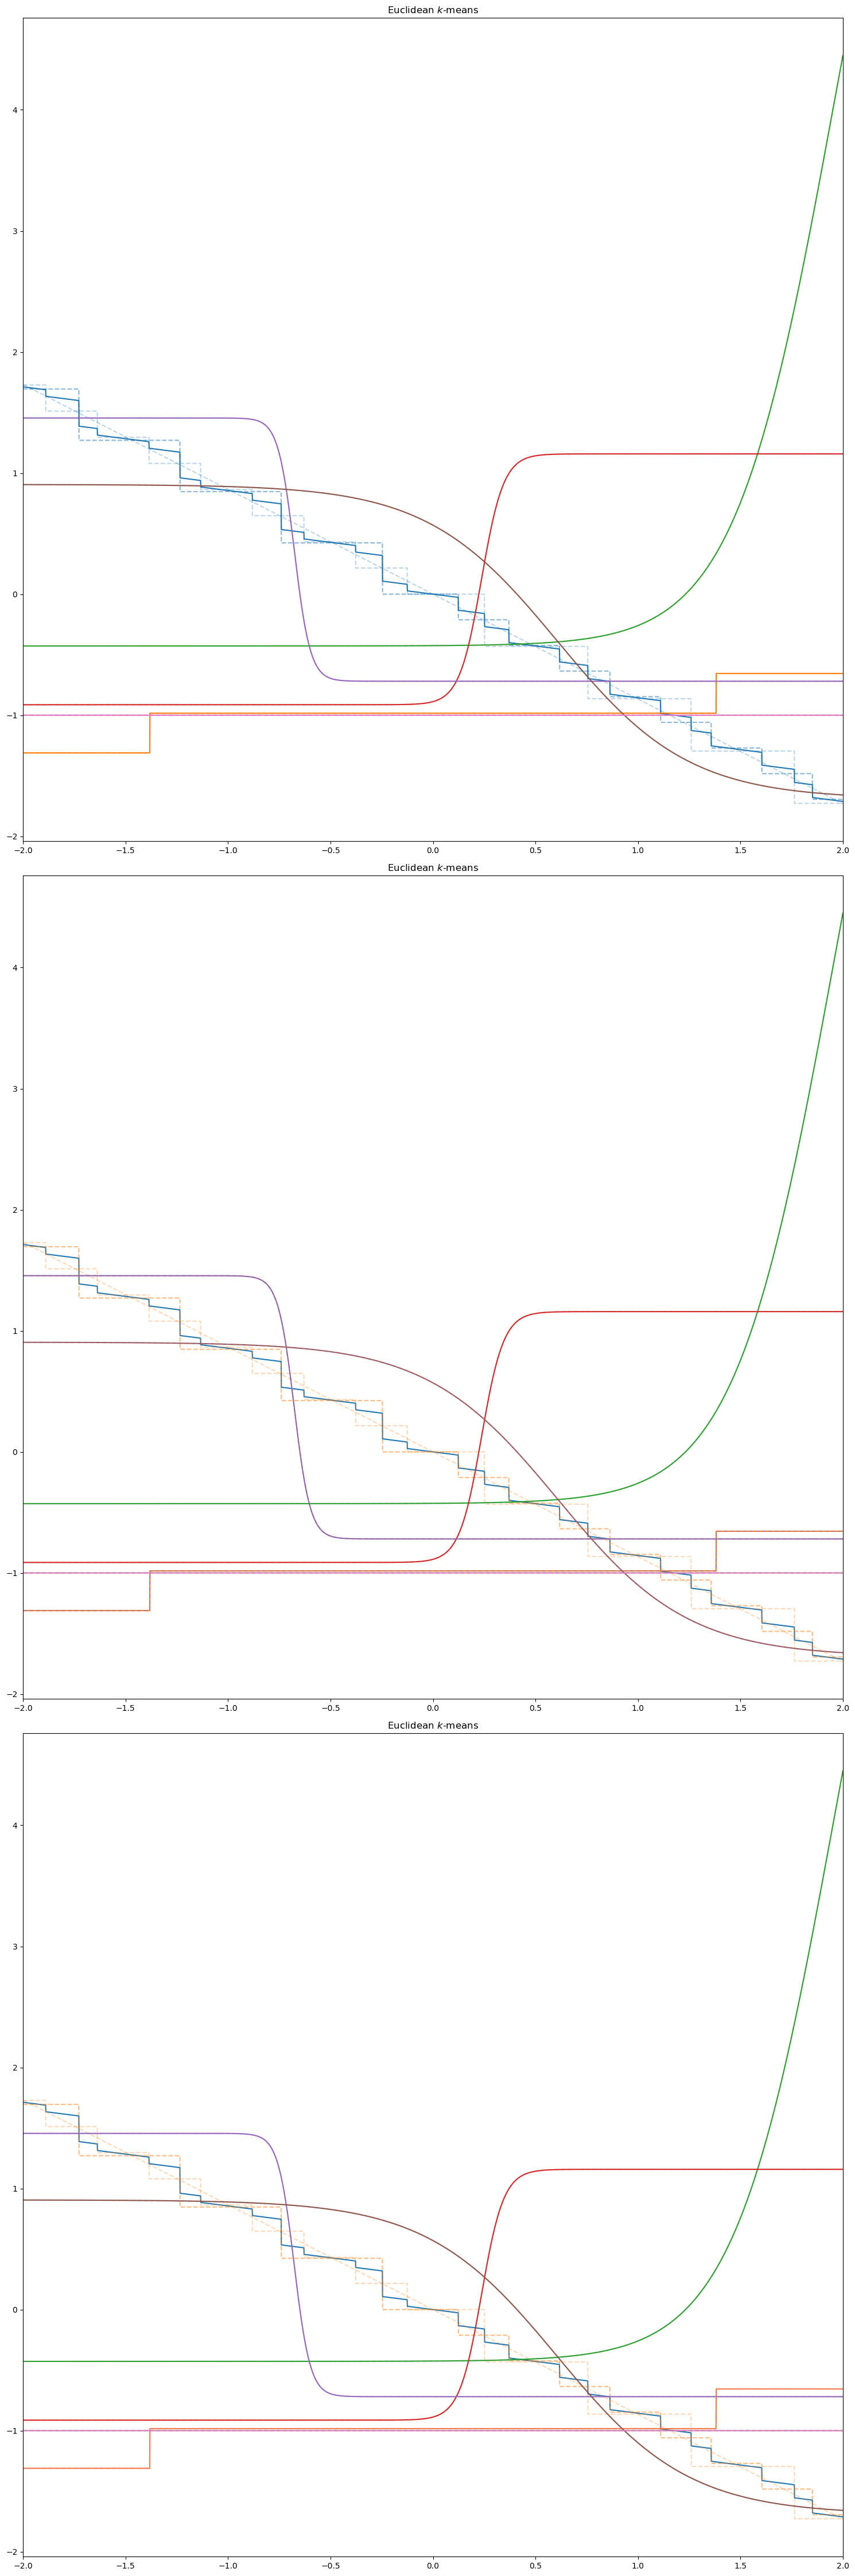

: 

: 

: 

In [150]:
colors = plt.cm.tab10.colors

plt.figure(figsize=(15, 45))

# Euclidean k-means
print("Euclidean k-means")
plt.subplot(3, 1, 1)
for yi in range(n_clusters):
    for j, xx in enumerate(X_train[y_pred_euc == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_euc == yi][0]), alpha=0.3)
    plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi])
    
    plt.xlim(-2, 2)
    # plt.legend()
    
    if yi == 1:
        plt.title("Euclidean $k$-means")
        
# DBA-k-means
print("DBA k-means")
plt.subplot(3, 1, 2)
for yi in range(n_clusters):
    for j, xx in enumerate(X_train[y_pred_dba == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_dba == yi][0]), alpha=0.3)
    plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi])
    
    plt.xlim(-2, 2)
    # plt.legend()
    
    if yi == 1:
        plt.title("Euclidean $k$-means")
        
        
# Soft-DTW-k-means
print("Soft-DTW k-means")
plt.subplot(3, 1, 3)
for yi in range(n_clusters):
    for j, xx in enumerate(X_train[y_pred_sdtw == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_sdtw == yi][0]), alpha=0.3)
    plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi])
    
    plt.xlim(-2, 2)
    # plt.legend()
    
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()

Euclidean k-means
DBA k-means
Soft-DTW k-means


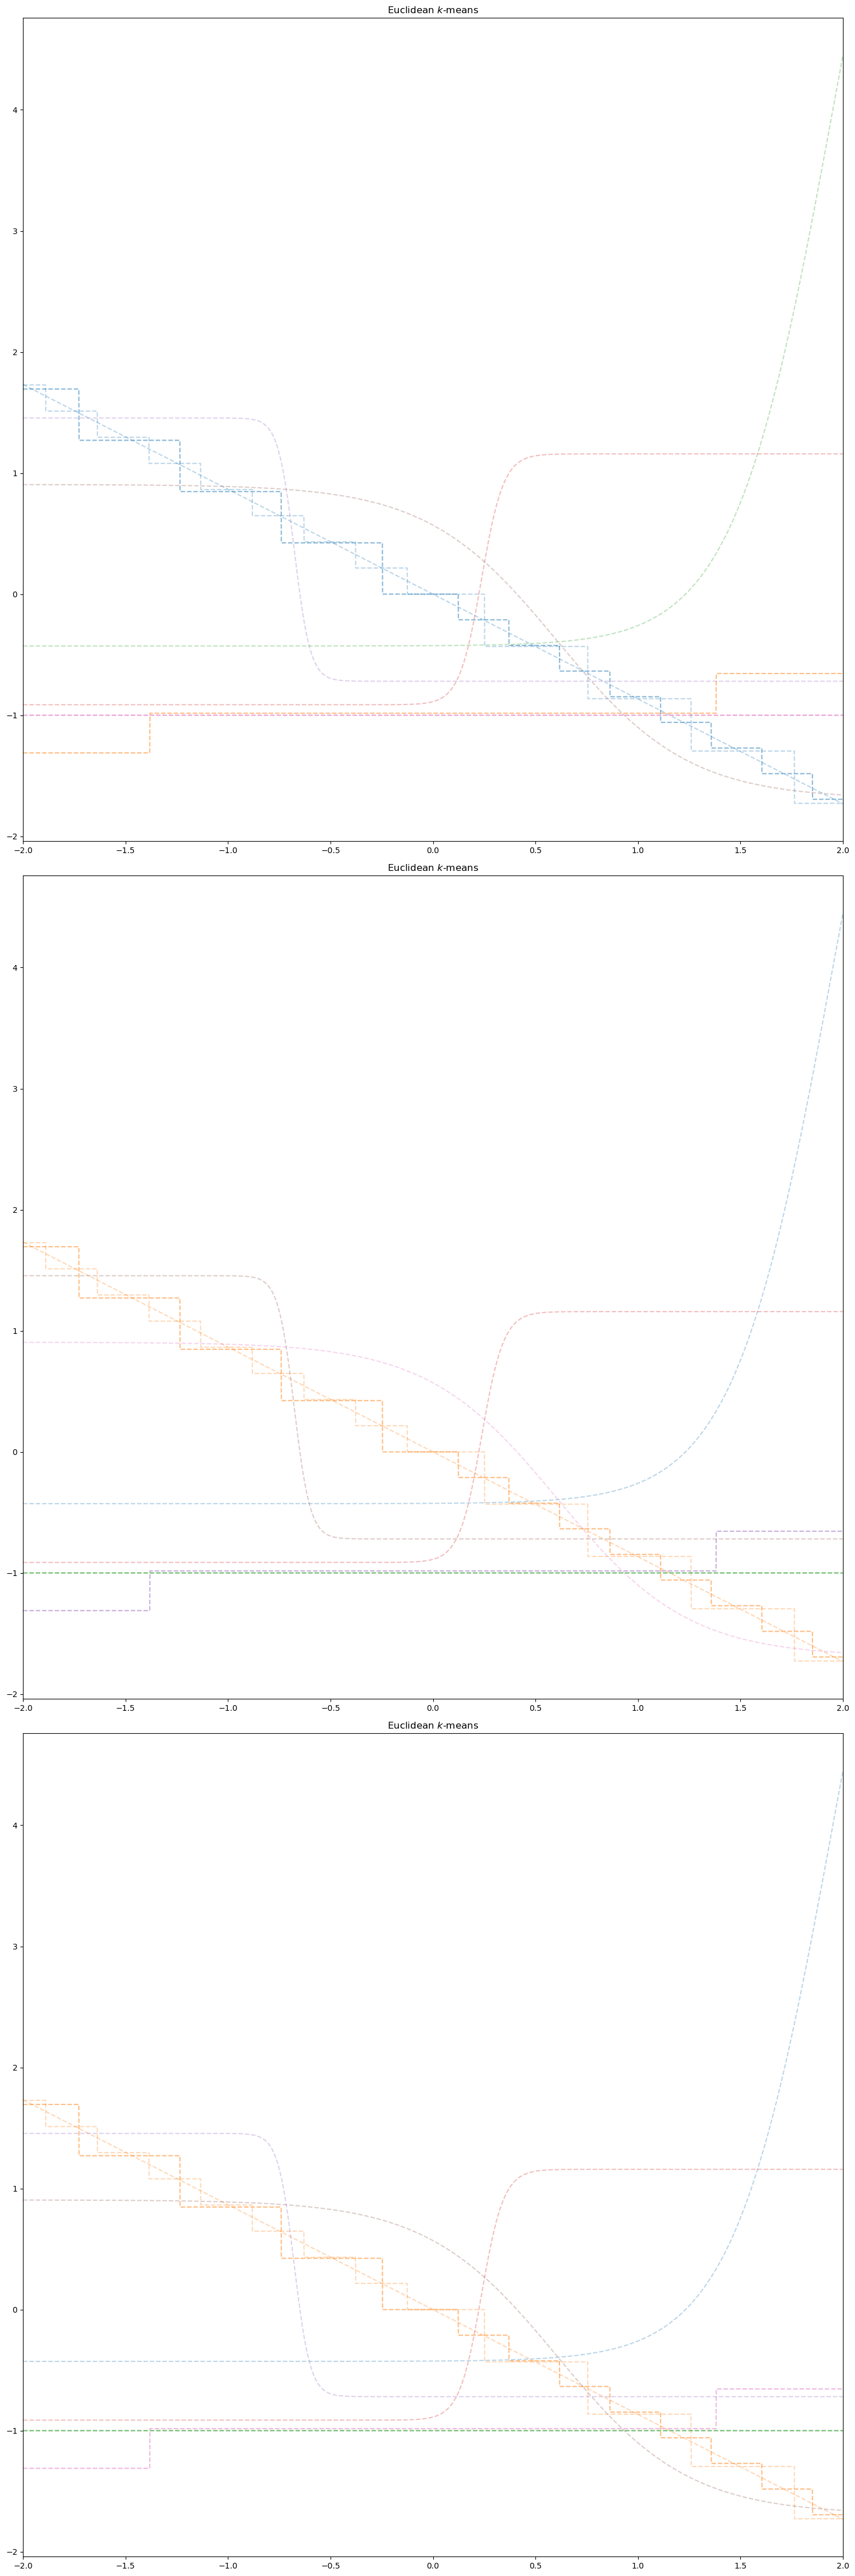

: 

: 

: 

In [151]:
colors = plt.cm.tab10.colors

plt.figure(figsize=(15, 45))

# Euclidean k-means
print("Euclidean k-means")
plt.subplot(3, 1, 1)
for yi in range(n_clusters):
    for j, xx in enumerate(X_train[y_pred_euc == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_euc == yi][0]), alpha=0.3)
    # plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi])
    
    plt.xlim(-2, 2)
    # plt.legend()
    
    if yi == 1:
        plt.title("Euclidean $k$-means")
        
# DBA-k-means
print("DBA k-means")
plt.subplot(3, 1, 2)
for yi in range(n_clusters):
    for j, xx in enumerate(X_train[y_pred_dba == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_dba == yi][0]), alpha=0.3)
    # plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi])
    
    plt.xlim(-2, 2)
    # plt.legend()
    
    if yi == 1:
        plt.title("Euclidean $k$-means")
        
        
# Soft-DTW-k-means
print("Soft-DTW k-means")
plt.subplot(3, 1, 3)
for yi in range(n_clusters):
    for j, xx in enumerate(X_train[y_pred_sdtw == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_sdtw == yi][0]), alpha=0.3)
    # plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi])
    
    plt.xlim(-2, 2)
    # plt.legend()
    
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()

In [74]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

Euclidean k-means


AttributeError: 'TimeSeriesKMeans' object has no attribute 'labels_'

: 

: 

: 